# 20160044 Shin Dong-Ha Assignment09
# Github Link : https://github.com/sinwindis/Assignment09

Importing Necessary Libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import lstsq

provided code

In [13]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


FUCNTION DEFINITION: sign(x)

In [14]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

DEFINE FUNCTION: generateRandomVector(sigma, precision, randomvector)

gets precision number of 784-sized vector whose element value is random value based on normal distribution

In [15]:
def generateRandomVector(sigma, precision, randomvector):

    size = (size_row*size_col)
    
    for i in range(precision):
        randomvector.append(np.random.normal(0, sigma, size))

DEFINE FUNCTION: fi(i, x)
    
$$returns:f_i(x) = r_i^Tx$$

In [16]:
def fi(i, x):
    score = float()
    
    for j in range(size_row*size_col):
        score += r[i][j]*x[j]

    return score

DEFINE FUNCTION: makeXhat


Generated Matrix
$$AX = B$$
$$A = [x_1, x_2, \dots, x_{784}]$$
$$X^T = [\theta_1, \theta_2, \dots, \theta_{784}]$$
$$B = isZero$$
$$\hat{X} = (A^TA)^{-1}A^TB$$

Returned Value
$$\hat{X}$$

In [17]:
def makeXhat(precision):

    constant_precision = precision
    
    A = np.empty((num_train, constant_precision), dtype=float)
    Xhat = np.empty((constant_precision), dtype=float)
    B = np.empty((num_train), dtype=float)
    
    

    
    for i in range(num_train):
        for j in range(constant_precision):
            A[i][j] = fi(j, list_image_train[:, i])
        
        
    for i in range(num_train):
        if list_label_train[i] == 0:
            B[i] = 1
        else:
            B[i] = -1

    Xhat = lstsq(A, B)
    
    #Xhat = np.matmul(np.matmul(np.transpose(A), inv(np.matmul(A, np.transpose(A)))), B)
    
    return Xhat[0]

DEFINE FUNCTION: classifier
$$classifier(precision, imageMatrix)$$
$$return: \theta_1f_1(imageMatrix) + \theta_2f_2(imageMatrix) + \dots + \theta_{precision}f_{precision}(imageMatrix)$$

In [18]:
def classifier(precision, testee, xhat):

    resSum = float()
    
    for i in range(precision):
        resSum += fi(i, testee)*xhat[i]
        
    return resSum

DEFINE FUNCTION: showResult(precision)

Makes Xhat, Distributes images, Shows average images

In [19]:
def showResult(p):

    
    thetaMatrix = makeXhat(p)


    #result = [0=TP 1=FP 2=TN 3=FN]
    result = np.empty((num_test))
    #average image = [image, 0=TP 1=FP 2=TN 3=FN]
    averageImage = np.zeros((size_row*size_col, 4))
    #resultCount = [0=TP 1=FP 2=TN 3=FN]
    resultCount = np.zeros((4), dtype=int)

    print("precision = ", p)
    for i in range(num_test):
        classresult = sign(classifier(p, list_image_test[:, i], thetaMatrix))
        if classresult == 1:
            if list_label_test[i] == 0:
                result[i] = 0
                averageImage[:, 0] += list_image_test[:, i]
                resultCount[0] += 1
            else:
                result[i] = 1
                averageImage[:, 1] += list_image_test[:, i]
                resultCount[1] += 1
        else:
            if list_label_test[i] == 0:
                result[i] = 3
                averageImage[:, 3] += list_image_test[:, i]
                resultCount[3] += 1
            else:
                result[i] = 2
                averageImage[:, 2] += list_image_test[:, i]
                resultCount[2] += 1
                
                
    #Plotting Average Matrix       
                
    for i in range(4):
        if resultCount[i] != 0:
            averageImage[i] /= resultCount[i]
        plt.subplot(2, 2, i+1)
        if i == 0:
            plt.title("TRUE POSITIVE")
        elif i == 1:
            plt.title("FALSE POSITIVE")
        elif i == 2:
            plt.title("TRUE NEGATIVE")
        elif i == 3:
            plt.title("FALSE NEGATIVE")
        
        plt.imshow(averageImage[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    
    plt.show()
    
    print("result count:")
    print("TP:", resultCount[0], " FP:", resultCount[1], " TN:", resultCount[2], " FN:", resultCount[3])
    Precision = resultCount[0]/(resultCount[1]+resultCount[0])
    Recall = resultCount[0]/(resultCount[0]+resultCount[3])
    f1score = 2*(Precision*Recall)/(Precision+Recall)
    print("F1 Score:", f1score)
    scoreList.append(f1score)

generating preferences

In [20]:
precision = 10
sigma = 1
r = list()
scoreList = list()
    
generateRandomVector(sigma, precision, r)

precision =  1


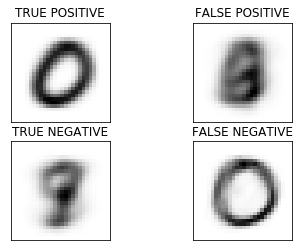

result count:
TP: 916  FP: 4197  TN: 4823  FN: 64
F1 Score: 0.3006729033316921


In [21]:
showResult(1)

precision =  2


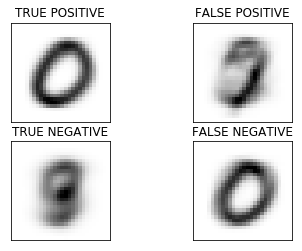

result count:
TP: 689  FP: 988  TN: 8032  FN: 291
F1 Score: 0.5186300338727889


In [22]:
showResult(2)

precision =  3


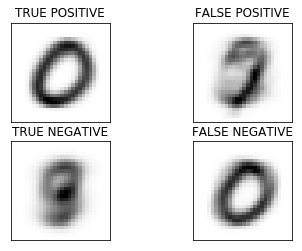

result count:
TP: 688  FP: 984  TN: 8036  FN: 292
F1 Score: 0.5188536953242836


In [23]:
showResult(3)

precision =  4


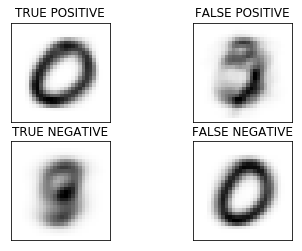

result count:
TP: 394  FP: 562  TN: 8458  FN: 586
F1 Score: 0.40702479338842973


In [24]:
showResult(4)

precision =  5


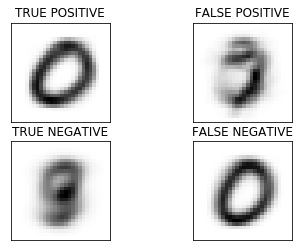

result count:
TP: 411  FP: 552  TN: 8468  FN: 569
F1 Score: 0.4230571281523417


In [25]:
showResult(5)

precision =  6


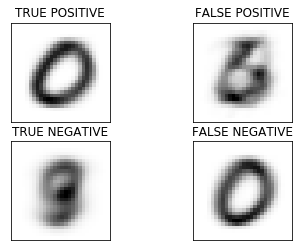

result count:
TP: 505  FP: 296  TN: 8724  FN: 475
F1 Score: 0.567097136440202


In [26]:
showResult(6)

precision =  7


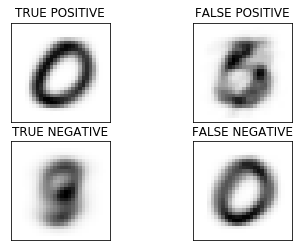

result count:
TP: 590  FP: 263  TN: 8757  FN: 390
F1 Score: 0.6437534097108565


In [27]:
showResult(7)

precision =  8


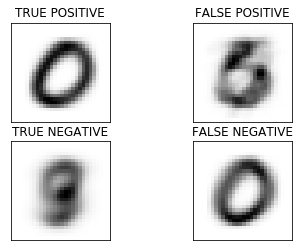

result count:
TP: 605  FP: 280  TN: 8740  FN: 375
F1 Score: 0.6487935656836461


In [28]:
showResult(8)

precision =  9


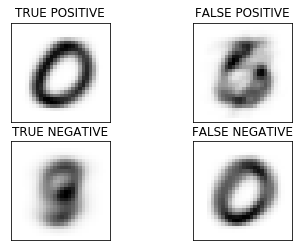

result count:
TP: 621  FP: 277  TN: 8743  FN: 359
F1 Score: 0.6613418530351438


In [29]:
showResult(9)

precision =  10


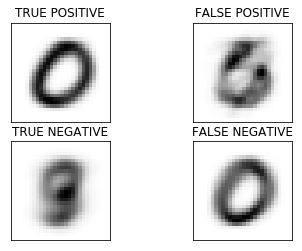

result count:
TP: 630  FP: 285  TN: 8735  FN: 350
F1 Score: 0.6649076517150396


In [30]:
showResult(10)

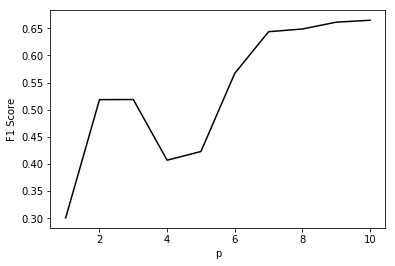

In [32]:
plt.plot(np.linspace(1, 10, 10), scoreList, "k-")
plt.xlabel("p")
plt.ylabel("F1 Score")
plt.show()